# Statistical Testing Examples in Python

In this lesson, we'll take a look at some examples of using statistical testing to analyze a dataset.

We'll be using the `tips` dataset, which contains information about each tip a waiter received while working in a restauraunt.

We'll focus on three tests for these specific purposes:

- **chi2**: to compare two categorical variables
- **pearson r**: to compare two continuous variables
- **t-test**: to compare one categorical and one continuous variable

Before we begin we will load in the data set and take a quick glance at it.

In [1]:
%matplotlib inline
import pandas as pd
from scipy import stats
from pydataset import data
import viz

tips = data('tips')

In [2]:
tips.shape

(244, 7)

In [3]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
1,16.99,1.01,Female,No,Sun,Dinner,2
2,10.34,1.66,Male,No,Sun,Dinner,3
3,21.01,3.50,Male,No,Sun,Dinner,3
4,23.68,3.31,Male,No,Sun,Dinner,2
5,24.59,3.61,Female,No,Sun,Dinner,4


## chi2

We use a chi2 test to compare two categorical variables. For this example, we will compare the `sex` variable with the `smoker` column. Our null hypothesis is that membership in these groups is independent, more formally:

$H_0$: sex is indep of whether or not someone is a smoker

First we need to generate a *contingency table*, which is another word for a cross tabulation, and can easily be generated with pandas.

In [4]:
contingency_table = pd.crosstab(tips.sex, tips.smoker)
contingency_table

smoker,No,Yes
sex,,
Female,54,33
Male,97,60


The way the chi2 test works is to compare the actual contingency table of the actual values against the table that we would predict to be the case if group membership is independent. When we perform the test, one of the returned values will be the expected values in the contingency table.

To perform the test, we simply pass the contingency table that we created with pandas to the `chi2_contingency` function from scipy.

In [5]:
test_results = stats.chi2_contingency(contingency_table)
test_results

(0.008763290531773594, 0.925417020494423, 1, array([[53.84016393, 33.15983607],
        [97.15983607, 59.84016393]]))

The function returns several values:

- the chi2 test statistic
- the p value
- the degrees of freedom
- the matrix of expected values

We'll focus in on the p value and the matrix of expected values:

In [6]:
_, p, _, expected = test_results

Now we can look at p to decide whether to reject / fail to reject H0.

In [7]:
p

0.925417020494423

With such a high p-value, we fail to reject the null hypothesis.

Less formally, it seems as though two groups are independent of each other. We can see an intuitive proof of this by comparing the expected values agains what we actually observed:

In [8]:
# Here we'll do some data frame manipulation with pandas to get the two tables
# into a more comparable form
expected = pd.DataFrame(expected, index=['Female', 'Male'], columns=['Non-Smoker', 'Smoker'])

contingency_table.columns = ['Non-Smoker', 'Smoker']
contingency_table.index.name = ''

contingency_table['group'] = 'Actual'
expected['group'] = 'Expected'

(pd.concat([contingency_table, expected])
 .reset_index()
 .rename({'index': 'sex'}, axis=1)
 .set_index(['group', 'sex']))

Non-Smoker     Smoker
group    sex                          
Actual   Female   54.000000  33.000000
         Male     97.000000  60.000000
Expected Female   53.840164  33.159836
         Male     97.159836  59.840164

The table above shows us that the actual values are very close to the expected values, thus our failure to reject the null hypothesis.

## Pearson R

We can use the pearson r test to compare two continuous variables and see if they are linearly correlated, and the strength of the correlation. We will use the only two continuous variables from our dataset, `total_bill` and `tip`. Our null hypothesis for this test is that there is no correlation between the two variables, more formally:

$H_0$: There is not linear correlation between the total bill and the tip amount.

To perform the test, we can pass the two `Series` that contain the values we are looking at to the `pearsonr` function form scipy's `stats` module.

In [9]:
test_results = stats.pearsonr(tips.total_bill, tips.tip)
test_results

(0.6757341092113645, 6.692470646863477e-34)

This test gives us back two pieces of information:
    
- the test statistic, in this case, the r value
- the p value

In [10]:
r, p = test_results

print(f'p is {p:.10f}')

p is 0.0000000000


Since p is 0 within 10 decimal places, we can safely reject the null hypothesis of no linear correlation. Less formally, it seems as though the total bill and tip amount are very related.

The test statistic for this test is the r value, which tells us how strongly correlated the two variables are.

We can see this with a visualization:

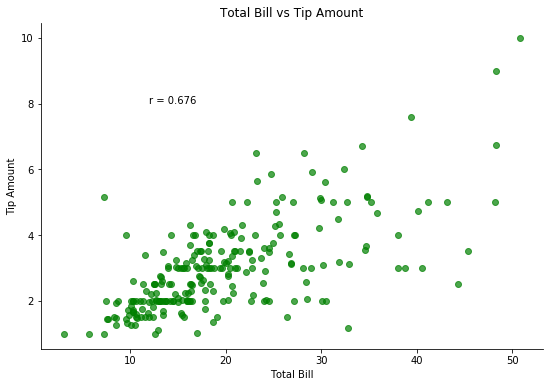

In [11]:
viz.more_examples_example1()

## T Test

We can use the t-test to compare a categorical feature with a continous feature.

We will focus on two kinds of t-tests:

- 1 sample: compares the mean for a subgroup against the population mean
- 2 sample: compares the means for two subgroups

In both cases, our null hypothesis is the same: there is no difference in the means.

To demonstrate, we'll try to answer two different questions:

- Is the total bill amount different for smokers?
- Is the size of the tip different for parties of 2 and parties of 4?

### 1 Sample T Test

> Is the total bill amount different for smokers?

To answer this question, we need two pieces of information, which we will pass along to scipy:

- the total bill amounts for all the smokers
- the overall total bill mean

We will feed both of these into the `ttest_1samp` function from scipy's `stats` module.

Our null hypothesis is that there is no difference, more formally:

$H_0$: The average bill for smokers is no different than the population mean.

In [12]:
smokers_total_bills = tips[tips.smoker == 'Yes'].total_bill
overall_total_bill_mean = tips.total_bill.mean()

test_results = stats.ttest_1samp(smokers_total_bills, overall_total_bill_mean)
test_results

Ttest_1sampResult(statistic=0.951796790928544, pvalue=0.3436939512284921)

This function gives us back two pieces of information, the test statstic and the p-value.

In this case, because our p-value is so high, we fail to reject our null hypothesis. Less formally, we conclude that smoker might not have a significant difference in their total bill.

Again a visualization can be helpful:

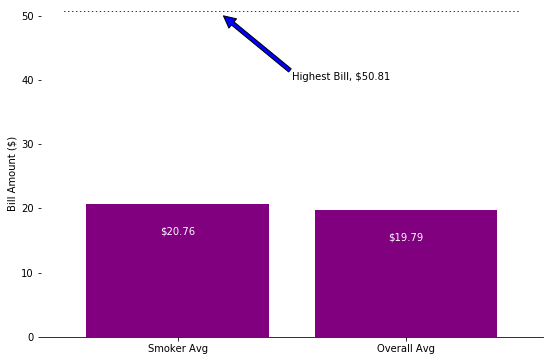

In [13]:
viz.more_examples_example2()

### 2 Sample T Test

> Is the total bill amount different for parties of 2 vs 4?

$H_0$: The average size of the tip left by parties of 2 and parties of 4 is the same.

For this example, we'll need to create two seperate datasets that contain the values for the continuous variable for each subgroup. In our case, this means we need all the tip values for parties of 2 and the tip values for parties of 4.

We'll pass these to the `ttest_ind` function from scipy's `stats` module.

In [14]:
parties_of_2 = tips[tips['size'] == 2]
parties_of_4 = tips[tips['size'] == 4]
test_results = stats.ttest_ind(parties_of_2.tip, parties_of_4.tip)
test_results

Ttest_indResult(statistic=-7.462130391296251, pvalue=2.924028981378475e-12)

Like before, the function returns the test statistic and the p-value. Here, with such a small p-value, we reject the null hypothesis. We think there is a significant difference in the average tip amount left by parties of 2 and parties of 4.

Let's visualize this as well:

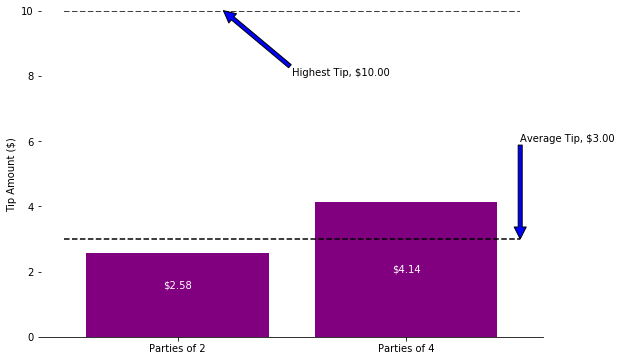

In [15]:
viz.more_examples_example3()

## Summary of Hypothesis Testing and Distributions

![](Selecting_a_hypothesis_test.svg)

## Exercise

Continue working in your `hypothesis_testing` notebook.

Choose several continous and categorical variables that were not covered in the lesson and perform each type of test on them. You may use another data set if you wish.